HINDISTONDAGI AYOLLARNING TIBBIY TEKSHIRUV MALUMOTLARI ASOSIDA TAYYORLANGAN LOYIHA. YA'NI BU LOYIHA AYOLLARNING KOKRAK SARATONIGA CHALINGANLIGI YOKI CHALINMAGANLIGINI ANIQLAB BERADI.
CREATED BY XAI


In [1]:
#BUNDA KERAKLI KUTUBXONLAR CHAQIRIB OLIINGAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# BUNDA KERAKLI MA'LUMOT(DATA) CHAQIRIB OLINGAN
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")

Ustunlar
Pregnancies: homilador bo’lish soni
Glucose: glyukozaga test natijasi
BloodPressure: diastolik qon bosimi (mm Hg)
SkinThickness: Triceps teri burmasining qalinligi (mm)
Insulin: 2 soatlik sarum insulini (mu U/ml)
BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
Age: Yosh (yil)
Outcome: Class (0 – diabet yo’q, 1 – diabet)
Dataset:

In [12]:
#BUNDA USTUNLARNING BIR-BIRIGA  QANCHALIK BOG'LIQLIGI TEKSHIRILGAN
df.corrwith(df["Outcome"]).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [18]:
#BUNDA  BOGLIQLIKNI TUSHUNISH  OSOROQ BOLADI
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
#MLGA TAYYORGARLIK
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# TRAIN AND TEST SPLIT(MALUMOTNI TRAIN VA TEST SETGA BOLIB OLISH)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati
#ML JARAYONI
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#QILINGAN BASHORAT
y_predict = knn.predict(X_test)

In [23]:
#JACCARD YORDAMIDA MODELNI BAHOLASH
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4520547945205479

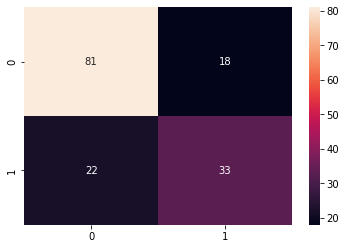

In [24]:
#Confusion_matrix YORDAMIDA BAHOLASH GRAFIK KORINISHIDA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [25]:
#Confusion_matrix YORDAMIDA BAHOLASH SON KORINISHIDA
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [22, 33]], dtype=int64)

In [26]:
#PRECISION RECALL F1-SCORE SUPPORT YORDAMIDA BAHOLASH
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [27]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768

